In [3]:
%matplotlib inline
from matplotlib import style
# Using this method tells matplotlib to use the 'fivethirtyeight' style: https://matplotlib.org/3.1.1/gallery/style_sheets/fivethirtyeight.html
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

In [7]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM (Object Relational Mapper)

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [35]:
# initiate a SQL engine to hold our database
engine = create_engine("sqlite:///hawaii.sqlite")

# create a base class for SQL Alchemy's automap schema. Note Base is capitalized because it is a Class
Base = automap_base()

In [36]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
# reflect the tables


In [37]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
# IN order to reference a specific class (or Table in this case) we use the following format: 
# Base.classes.<class name>

# We can alias our classes by giving them new, more convenient names (re-assign)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [39]:
# Create our session (link) from Python to the DB
# Once a session is created, we can query our data
session = Session(engine)


# Exploratory Climate Analysis

In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
# Use the timedelta() method to substract 365 days
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores

# Initialize an empty list to store results
results = []

# Begin a SQLAlchemy query which returns both the date and prcp columns from the Measurement table and assigns to results
results = session.query(Measurement.date, Measurement.prcp)

# Reassign results to return only rows where the date is >prev_year
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

# Use the all() function to return all the results from the query and saves it to a list
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Print all rows from results, in the form of a list of tuples
print(results)




, ('2016-12-15', 0.0), ('2016-12-16', 0.0), ('2016-12-17', 0.16), ('2016-12-18', 0.27), ('2016-12-19', 0.02), ('2016-12-20', 0.01), ('2016-12-21', 0.06), ('2016-12-22', 0.14), ('2016-12-23', 0.02), ('2016-12-24', 0.06), ('2016-12-25', 0.0), ('2016-12-26', 0.06), ('2016-12-27', 0.0), ('2016-12-28', 0.06), ('2016-12-29', 0.05), ('2016-12-30', 0.07), ('2017-01-01', None), ('2017-01-03', None), ('2017-01-04', 0.18), ('2017-01-05', 0.42), ('2017-01-06', 0.01), ('2017-01-07', 0.0), ('2017-01-08', 0.0), ('2017-01-09', 0.0), ('2017-01-10', 0.0), ('2017-01-12', None), ('2017-01-15', None), ('2017-01-16', 0.0), ('2017-01-18', None), ('2017-01-19', 0.0), ('2017-01-20', 0.0), ('2017-01-21', 0.11), ('2017-01-22', 0.04), ('2017-01-23', 0.0), ('2017-01-24', 0.08), ('2017-01-25', 0.0), ('2017-01-26', 0.0), ('2017-01-27', 0.0), ('2017-01-29', None), ('2017-01-30', 0.0), ('2017-01-31', 0.0), ('2017-02-01', 0.0), ('2017-02-02', 0.0), ('2017-02-03', 0.0), ('2017-02-04', 0.0), ('2017-02-05', 0.0), ('2017-0

In [52]:
# Save the query results as a Pandas DataFrame and set the index to the date column

# The following syntax exists when we don't pass in an already converted file: pd.Dataframe(<results>,<columns=['name1','name2']>)
df = pd.DataFrame(results, columns=['date','precipitation'])

# Set the index to the date column, passing inplace=True to make change to the existing dataframe and not return a new dataframe object
df.set_index(df['date'], inplace=True)
df

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
...,...,...
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,NaN
2017-08-21,2017-08-21,0.56


In [53]:
# The dataframe above prints, but the date column is now duplicated
# Print dataframe WITHOUT index

print(df.to_string(index=False))

7-10           0.00
 2017-07-11           0.00
 2017-07-12           0.00
 2017-07-13           0.11
 2017-07-14           0.00
 2017-07-15           0.00
 2017-07-16           0.00
 2017-07-17           0.00
 2017-07-18           0.00
 2017-07-19           0.00
 2017-07-20           0.33
 2017-07-21           0.00
 2017-07-22           0.00
 2017-07-24            NaN
 2017-07-25           0.05
 2017-07-26           0.00
 2017-07-27           0.00
 2017-07-28           0.00
 2017-07-29           0.00
 2017-07-30           0.00
 2017-07-31           0.00
 2017-08-01           0.00
 2017-08-02           0.00
 2017-08-03           0.00
 2017-08-04           0.00
 2017-08-06           0.00
 2017-08-07           0.00
 2017-08-08           0.00
 2017-08-10           0.00
 2017-08-11           0.00
 2017-08-12           0.00
 2017-08-13           0.00
 2017-08-14           0.08
 2017-08-15           0.06
 2017-08-16           0.07
 2017-08-17           0.05
 2017-08-19            NaN
 2017-08

4-16           0.00
 2017-04-17           0.30
 2017-04-17           1.30
 2017-04-17           0.41
 2017-04-17            NaN
 2017-04-17           0.02
 2017-04-17            NaN
 2017-04-17           1.04
 2017-04-18           0.98
 2017-04-18           0.15
 2017-04-18           0.12
 2017-04-18           0.00
 2017-04-18           0.08
 2017-04-18           0.00
 2017-04-18           2.03
 2017-04-19           0.02
 2017-04-19           0.02
 2017-04-19            NaN
 2017-04-19           0.02
 2017-04-19           0.14
 2017-04-19           0.00
 2017-04-19           0.00
 2017-04-20           0.05
 2017-04-20           0.00
 2017-04-20           0.00
 2017-04-20           0.35
 2017-04-20           0.33
 2017-04-20            NaN
 2017-04-20           0.05
 2017-04-21           1.84
 2017-04-21           1.74
 2017-04-21           0.23
 2017-04-21           2.36
 2017-04-21            NaN
 2017-04-21           1.16
 2017-04-21           1.05
 2017-04-22           1.01
 2017-04

<AxesSubplot:xlabel='date'>

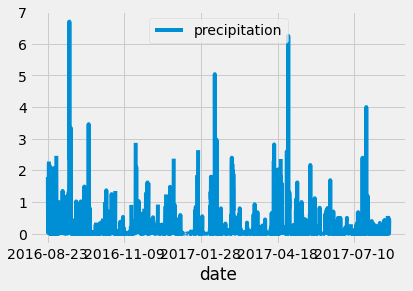

In [61]:
# Sort the dataframe by date
df = df.sort_index()
print(df.to_string(index=False))

<AxesSubplot:xlabel='date'>

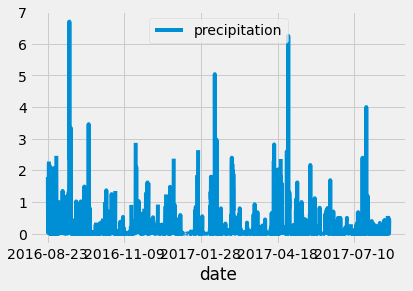

In [62]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [64]:
# How many stations are available in this dataset?

# Query the table to find out the # of stations
# func.count() returns the number of records
session.query(func.count(Station.station)).all()


[(9)]

In [69]:
# What are the most active stations? (AKA Which stations produce more observations, which produce less?)
# List the stations and the counts in descending order.

# Query the session and return the station name/id and the number of observations from that station (func.count())
# Use SQLAlchemy's group_by to group the values by the station
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station)).all()


[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

## The above code does the following:

1. Queries the session
2. Returns the station and the count of measurements from each station as a column 
3. Groups the output by the station (group_by(Measurement.station))
4. Orders them in a ascending order (.order_by(func.count(Measurement.station))
5. Returns all observations (.all())

We can see that USC00519281 produced the most observations, at 2772.

In [71]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# the .tobs are the total observations
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

In [82]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()

print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [81]:
# Convert the above data to a dataframe

df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

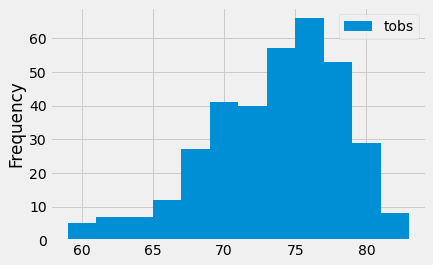

In [86]:
# Create a histogram to plot the above dataframe

# Choose the number of bins to place our data in
# The hist() function will arbitrarily choose the bin ranges as long as we pass the number of bins required
df.plot.hist(bins=12)
plt.tight_layout # squeeze x-axis labels for presentation purposes

## Observe changing the bin #s above either smoothens out the plot (reducing the bins) or increases its granularity (increasing the bins)

In [33]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge